In [1]:
# import modules
import pandas as pd
import numpy as np
import scipy.stats as scistat
import statsmodels.api as sm
import os

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data
csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_agb_fpca2_dry_edit.csv"
output_dir = r"F:\cdu\data\eda"

In [3]:
df = pd.read_csv(csv_file, parse_dates=['date'])
# set uid to index
df.set_index("uid_x", inplace=True)
df.shape

(180, 45)

In [4]:
df.columns

Index(['site', 'collect', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha',
       'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha',
       'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha',
       'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha',
       'c_agb_kg1ha', 'basal_dt', 'uid_y', 'image', 's_day', 's_month',
       's_year', 's_date', 'e_day', 'e_month', 'e_year', 'e_date',
       'b1_fpca2_count', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean',
       'b1_fpca2_med', 'b1_fpca2_std', 'b1_fpca2_p25', 'b1_fpca2_p50',
       'b1_fpca2_p75', 'b1_fpca2_p95', 'b1_fpca2_p99', 'b1_fpca2_range',
       'image_s_dt'],
      dtype='object')

In [5]:
ntg = df[df["collect"]=="ntg"]

In [6]:
df= ntg

In [8]:
# drop unwanted columns
df.drop(['date', 'collect', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 
         'bio_s_kg1ha', 'bio_r_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 
         'c_r_kg1ha', 'c_agb_kg1ha', 'basal_dt',  'basal_dt', 'uid_y', 'image', 's_day', 's_month', 's_year', 's_date',
       'e_day', 'e_month', 'e_year', 'e_date', 'b1_fpca2_count', 'b1_fpca2_range', 'image_s_dt'], axis=1, inplace=True)

In [9]:
#drop null values
df.dropna(inplace=True)

In [10]:
df.index.nunique()

115

In [11]:
df.sample(8, random_state=2).T

uid_x,117,85,16,113,24,80,35,7
site,el02,vrd23,auv08,ant06,amg02,vrd18,ant05,jdr04
bio_agb_kg1ha,2439.36,406.56,0.0,6006.0,0.0,0.0,0.0,3742.2
b1_fpca2_min,0.96854,0.4067,0.09197,14.648533,12.109756,0.170493,0.275141,6.41712
b1_fpca2_max,2.4818,1.48626,1.48626,35.469837,23.343081,3.292108,2.872306,13.779837
b1_fpca2_mean,1.66385,0.795091,0.504489,27.219117,15.908027,1.0217,1.03854,8.496464
b1_fpca2_med,1.48626,0.752944,0.4067,27.614885,15.549127,0.860742,0.752944,7.683354
b1_fpca2_std,0.446594,0.320448,0.410189,4.792809,2.739258,0.682073,0.626216,1.7054
b1_fpca2_p25,1.417919,0.565797,0.248979,24.391783,13.779837,0.565797,0.565797,7.683354
b1_fpca2_p50,1.48626,0.752944,0.4067,27.614885,15.549127,0.860742,0.752944,7.683354
b1_fpca2_p75,1.871759,0.96854,0.565797,30.934763,17.380726,1.212895,1.212895,9.238324


In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.describe())

       bio_agb_kg1ha  b1_fpca2_min  b1_fpca2_max  b1_fpca2_mean  b1_fpca2_med  \
count     115.000000    115.000000    115.000000     115.000000    115.000000   
mean     3937.566488      6.294661     15.120265      10.044586      9.910418   
std      7351.647761      8.851292     14.173295      11.205763     11.316787   
min         0.000000      0.008696      0.170493       0.079379      0.038517   
25%         0.000000      0.752944      3.741091       1.833155      1.486260   
50%         0.000000      2.120632      9.056872       4.586951      4.472551   
75%      4720.593500      9.419775     23.343081      15.467533     15.543931   
max     35199.710000     53.781818     71.015564      58.866707     58.682688   

       b1_fpca2_std  b1_fpca2_p25  b1_fpca2_p50  b1_fpca2_p75  b1_fpca2_p95  \
count    115.000000    115.000000    115.000000    115.000000    115.000000   
mean       2.343180      8.402560      9.910418     11.391032     13.621585   
std        1.966007     10.341730

In [13]:
key_var = ['site','bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean', 'b1_fpca2_med', 'b1_fpca2_p25', 'b1_fpca2_p50', 'b1_fpca2_p75',
       'b1_fpca2_p95', 'b1_fpca2_p99']

In [14]:
df_key = df[key_var]

In [15]:
df_key

,site,bio_agb_kg1ha,b1_fpca2_min,b1_fpca2_max,b1_fpca2_mean,b1_fpca2_med,b1_fpca2_p25,b1_fpca2_p50,b1_fpca2_p75,b1_fpca2_p95,b1_fpca2_p99
uid_x,,,,,,,,,,,
52,agb02,0.000000,14.648533,25.453907,20.006735,20.787782,17.147974,20.787782,22.308666,23.870787,25.137283
23,amg01,8376.216104,16.449720,33.189796,23.644734,24.391783,21.289408,24.391783,25.722572,27.893631,32.130563
24,amg02,0.000000,12.109756,23.343081,15.908027,15.549127,13.779837,15.549127,17.380726,19.584018,22.591268
25,amg03,0.000000,3.741091,13.779837,6.702390,6.417120,4.099609,6.417120,7.723121,11.345316,13.292933
26,amg05,24670.800000,13.779837,25.453907,18.835165,19.299746,16.449720,19.299746,20.286156,22.465928,24.856311
...,...,...,...,...,...,...,...,...,...,...,...
73,wh11,0.000000,0.752944,6.417120,1.931255,1.486260,1.212895,1.486260,2.210924,3.874893,5.908674
74,wh12,0.000000,0.752944,2.120632,1.146631,1.090717,0.914641,1.090717,1.212895,1.871759,2.070857
75,wh13,0.000000,0.275141,4.219115,0.801123,0.486249,0.275141,0.486249,0.968540,1.964450,3.768182


In [16]:
df_key.describe()

,bio_agb_kg1ha,b1_fpca2_min,b1_fpca2_max,b1_fpca2_mean,b1_fpca2_med,b1_fpca2_p25,b1_fpca2_p50,b1_fpca2_p75,b1_fpca2_p95,b1_fpca2_p99
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,3937.566488,6.294661,15.120265,10.044586,9.910418,8.402560,9.910418,11.391032,13.621585,14.814515
std,7351.647761,8.851292,14.173295,11.205763,11.316787,10.341730,11.316787,12.151413,13.292832,13.972506
min,0.000000,0.008696,0.170493,0.079379,0.038517,0.008696,0.038517,0.170493,0.170493,0.170493
25%,0.000000,0.752944,3.741091,1.833155,1.486260,1.151806,1.486260,2.210924,3.303332,3.741091
50%,0.000000,2.120632,9.056872,4.586951,4.472551,3.628846,4.472551,5.402423,7.840279,8.951882
75%,4720.593500,9.419775,23.343081,15.467533,15.543931,13.779837,15.543931,17.380726,21.314889,22.772075
max,35199.710000,53.781818,71.015564,58.866707,58.682688,56.800046,58.682688,60.271679,62.957650,69.403981


Substantial differences between the mean and median, as an indication of skewness.

The interquartile range is also the target value, with the 75th percentile value being about 800 times larger than the 25th percentile value (9210.71, 18.48). We can compare that with the band median and means; b2 has the largest distribution and woyld likly be better at explaining the differences with the target vale; however, the 75th percentile value being about 5 times larger than the 25th percentile vale (55, 11).

In [17]:
df_key.quantile(np.arange(0.0, 1.1, 0.1))

,bio_agb_kg1ha,b1_fpca2_min,b1_fpca2_max,b1_fpca2_mean,b1_fpca2_med,b1_fpca2_p25,b1_fpca2_p50,b1_fpca2_p75,b1_fpca2_p95,b1_fpca2_p99
0.0,0.0000,0.008696,0.170493,0.079379,0.038517,0.008696,0.038517,0.170493,0.170493,0.170493
0.1,0.0000,0.275141,2.481800,1.030925,0.860742,0.565797,0.860742,1.240231,2.026923,2.481800
0.2,0.0000,0.565797,3.292108,1.578290,1.486260,0.968540,1.486260,1.943992,2.907058,3.279514
0.3,0.0000,0.752944,4.219115,1.942062,1.788801,1.212895,1.788801,2.638003,3.804388,4.161752
0.4,0.0000,1.115153,6.417120,3.256424,3.292108,2.603353,3.292108,3.812795,5.325999,5.963169
0.5,0.0000,2.120632,9.056872,4.586951,4.472551,3.628846,4.472551,5.402423,7.840279,8.951882
0.6,262.4160,4.219115,14.648533,8.452033,8.305293,5.946455,8.305293,9.857791,11.941851,14.147854
0.7,3514.2604,6.912706,19.299746,13.829890,13.704074,10.777831,13.704074,15.720932,18.196726,19.079573
0.8,6748.5565,12.274476,25.886103,17.323186,18.047764,15.538734,18.047764,19.694310,23.165706,25.392435
0.9,11492.9710,16.449720,35.012757,25.657570,24.391783,21.748074,24.391783,30.599998,33.985935,34.684431


Normal distributions are distributed symmetrically (have low skew), and that they have relatively normal tails (neither excessively high nor excessively low kurtosis).

Expect a value near 0 for skew and 3 for kurtosis

In [18]:
df_key.skew()

C:\Users\rmcgr\AppData\Local\Temp\ipykernel_9036\2299486602.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_key.skew()


bio_agb_kg1ha    2.355928
b1_fpca2_min     2.435124
b1_fpca2_max     1.275004
b1_fpca2_mean    1.661267
b1_fpca2_med     1.646051
b1_fpca2_p25     1.912446
b1_fpca2_p50     1.646051
b1_fpca2_p75     1.468252
b1_fpca2_p95     1.321888
b1_fpca2_p99     1.282939
dtype: float64

In [19]:
df_key.kurtosis()

C:\Users\rmcgr\AppData\Local\Temp\ipykernel_9036\2844226237.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_key.kurtosis()


bio_agb_kg1ha    5.209468
b1_fpca2_min     7.833394
b1_fpca2_max     1.390199
b1_fpca2_mean    2.975553
b1_fpca2_med     2.850281
b1_fpca2_p25     4.319150
b1_fpca2_p50     2.850281
b1_fpca2_p75     1.922135
b1_fpca2_p95     1.295333
b1_fpca2_p99     1.372111
dtype: float64

### Shapiro-Wilk test

Shapiro-Wilk test on the distribution.
P-values less than 0.05 indicate that we can reject the null hypothesis of normal distribution.

Note: non normal distribution may limit the models (i.e. linear regression)

In [20]:
for var in key_var[1:]:

      stat, p = scistat.shapiro(df_key[var].dropna())

      print("feature=", var, "     p-value=", '{:.6f}'.format(p))

feature= bio_agb_kg1ha      p-value= 0.000000
feature= b1_fpca2_min      p-value= 0.000000
feature= b1_fpca2_max      p-value= 0.000000
feature= b1_fpca2_mean      p-value= 0.000000
feature= b1_fpca2_med      p-value= 0.000000
feature= b1_fpca2_p25      p-value= 0.000000
feature= b1_fpca2_p50      p-value= 0.000000
feature= b1_fpca2_p75      p-value= 0.000000
feature= b1_fpca2_p95      p-value= 0.000000
feature= b1_fpca2_p99      p-value= 0.000000


## Identifying extreme values and outliers in univariate analysis

In [21]:
df_key

,site,bio_agb_kg1ha,b1_fpca2_min,b1_fpca2_max,b1_fpca2_mean,b1_fpca2_med,b1_fpca2_p25,b1_fpca2_p50,b1_fpca2_p75,b1_fpca2_p95,b1_fpca2_p99
uid_x,,,,,,,,,,,
52,agb02,0.000000,14.648533,25.453907,20.006735,20.787782,17.147974,20.787782,22.308666,23.870787,25.137283
23,amg01,8376.216104,16.449720,33.189796,23.644734,24.391783,21.289408,24.391783,25.722572,27.893631,32.130563
24,amg02,0.000000,12.109756,23.343081,15.908027,15.549127,13.779837,15.549127,17.380726,19.584018,22.591268
25,amg03,0.000000,3.741091,13.779837,6.702390,6.417120,4.099609,6.417120,7.723121,11.345316,13.292933
26,amg05,24670.800000,13.779837,25.453907,18.835165,19.299746,16.449720,19.299746,20.286156,22.465928,24.856311
...,...,...,...,...,...,...,...,...,...,...,...
73,wh11,0.000000,0.752944,6.417120,1.931255,1.486260,1.212895,1.486260,2.210924,3.874893,5.908674
74,wh12,0.000000,0.752944,2.120632,1.146631,1.090717,0.914641,1.090717,1.212895,1.871759,2.070857
75,wh13,0.000000,0.275141,4.219115,0.801123,0.486249,0.275141,0.486249,0.968540,1.964450,3.768182


In [22]:
var_ = "bio_agb_kg1ha"

In [23]:
thirdq, firstq = df_key[var_].quantile(0.75), df_key[var_].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")

-7080.89025 <--> 11801.48375


In [24]:
df.loc[df[var_]>extvalhigh].T

uid_x,26,28,54,55,57,58,56,4,5,1
site,amg05,amg08,ep01,girra01,hsf01,hsf02,hshr01,jdr01,jdr02,lit01
bio_agb_kg1ha,24670.8,29521.8,18757.2,17994.76,25701.69,26636.295,35199.71,21469.14,22699.39,25585.07
b1_fpca2_min,13.779837,23.343081,53.781818,4.725986,29.81888,33.189796,30.934763,16.44972,13.779837,34.327137
b1_fpca2_max,25.453907,45.850407,71.015564,34.327137,46.998966,41.232662,52.66787,34.327137,27.614885,44.698696
b1_fpca2_mean,18.835165,35.404507,58.866707,11.157696,37.714575,36.739747,41.459262,25.83706,20.714716,40.3688
b1_fpca2_med,19.299746,35.469837,58.682688,9.056872,37.767738,36.043419,40.654551,24.391783,20.286156,41.232662
b1_fpca2_std,2.715835,5.048976,3.777438,6.230756,4.619884,2.569199,5.368042,5.562332,3.655886,2.869116
b1_fpca2_p25,16.44972,32.907023,56.800046,7.683354,34.327137,34.327137,37.480054,21.289408,17.380726,38.921173
b1_fpca2_p50,19.299746,35.469837,58.682688,9.056872,37.767738,36.043419,40.654551,24.391783,20.286156,41.232662
b1_fpca2_p75,20.286156,38.056097,60.271679,12.109756,40.365495,38.056097,44.121067,30.097851,23.343081,42.389004


The Howard Springs outliers may be explained by the dense woody veg

In [25]:
df.mean()

C:\Users\rmcgr\AppData\Local\Temp\ipykernel_9036\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


bio_agb_kg1ha    3937.566488
b1_fpca2_min        6.294661
b1_fpca2_max       15.120265
b1_fpca2_mean      10.044586
b1_fpca2_med        9.910418
b1_fpca2_std        2.343180
b1_fpca2_p25        8.402560
b1_fpca2_p50        9.910418
b1_fpca2_p75       11.391032
b1_fpca2_p95       13.621585
b1_fpca2_p99       14.814515
dtype: float64

In [26]:
df_out = df.loc[df[var_]<extvalhigh]

In [27]:
output_path = os.path.join(output_dir, "merged_slats_field_agb_dp1_dry_outlier.csv")
df_out.to_csv(os.path.join(output_path), index=False)
print("File output to: ", output_path) 

File output to:  F:\cdu\data\eda\merged_slats_field_agb_dp1_dry_outlier.csv


In [28]:
df_out.shape

(105, 12)

In [29]:
df_key_out = df_key.loc[df_key[var_]<extvalhigh]

In [30]:
output_path = os.path.join(output_dir, "merged_slats_field_agb_dp1_dry_key_outlier.csv")
df_key_out.to_csv(os.path.join(output_path), index=False)
print("File output to: ", output_path)  

File output to:  F:\cdu\data\eda\merged_slats_field_agb_dp1_dry_key_outlier.csv


In [31]:
df_key_out.shape

(105, 11)

In [32]:
df_out.mean()

C:\Users\rmcgr\AppData\Local\Temp\ipykernel_9036\3233882101.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_out.mean()


bio_agb_kg1ha    1948.421820
b1_fpca2_min        4.473858
b1_fpca2_max       12.520412
b1_fpca2_mean       7.885992
b1_fpca2_med        7.779168
b1_fpca2_std        2.162364
b1_fpca2_p25        6.368844
b1_fpca2_p50        7.779168
b1_fpca2_p75        9.151166
b1_fpca2_p95       11.154251
b1_fpca2_p99       12.243987
dtype: float64

In [33]:
def getextremevalues(dfin):
    
    dfout = pd.DataFrame(columns=dfin.columns, data=None)
    for col in dfin.columns[1:]:
        thirdq, firstq = dfin[col].quantile(0.75), dfin[col].quantile(0.25)
        interquartilerange = 1.5*(thirdq-firstq)
        extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
        #print(extvalhigh, extvallow)
        
        extreme_df = dfin.loc[(dfin[col]>extvalhigh) | (dfin[col]<extvallow)]
        #print(extreme_df)
        print(list(extreme_df))


In [34]:
getextremevalues(df_key)

['site', 'bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean', 'b1_fpca2_med', 'b1_fpca2_p25', 'b1_fpca2_p50', 'b1_fpca2_p75', 'b1_fpca2_p95', 'b1_fpca2_p99']
['site', 'bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean', 'b1_fpca2_med', 'b1_fpca2_p25', 'b1_fpca2_p50', 'b1_fpca2_p75', 'b1_fpca2_p95', 'b1_fpca2_p99']
['site', 'bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean', 'b1_fpca2_med', 'b1_fpca2_p25', 'b1_fpca2_p50', 'b1_fpca2_p75', 'b1_fpca2_p95', 'b1_fpca2_p99']
['site', 'bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean', 'b1_fpca2_med', 'b1_fpca2_p25', 'b1_fpca2_p50', 'b1_fpca2_p75', 'b1_fpca2_p95', 'b1_fpca2_p99']
['site', 'bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean', 'b1_fpca2_med', 'b1_fpca2_p25', 'b1_fpca2_p50', 'b1_fpca2_p75', 'b1_fpca2_p95', 'b1_fpca2_p99']
['site', 'bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean', 'b1_fpca2_med', 'b1_fpca2_p25', 'b1_fpca2_p50', 'b1_fpca2_p75', 'b1_fp

### QQ plot

Quantile-quantile (Q-Q) plots can improve our sense of that distribution by allowing us to view it graphically relative to a theoretical distribution: normal, uniform, log, or others.

 - Negative skew have an umbrella-like shape
 - Positive skew have a bowl-like shape

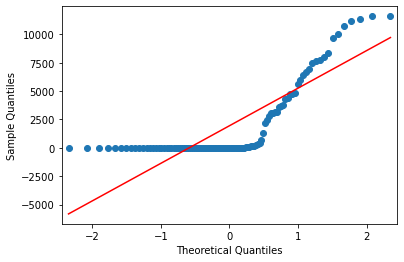

In [35]:
sm.qqplot(df_out[[var_]].sort_values([var_]).dropna(),line='s')
plt.show()

Indicating a positive skew

bio_agb_kg1ha


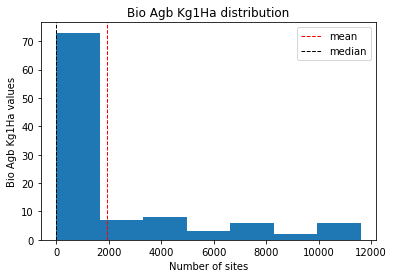

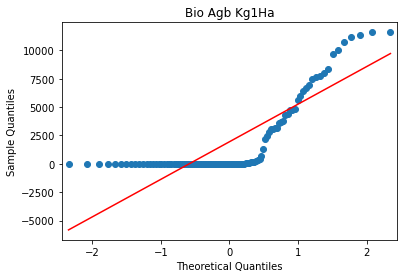

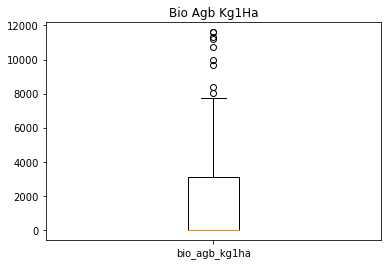

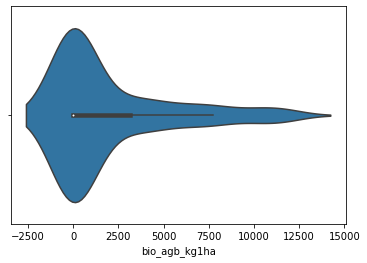

b1_fpca2_min


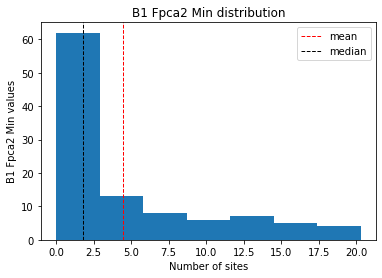

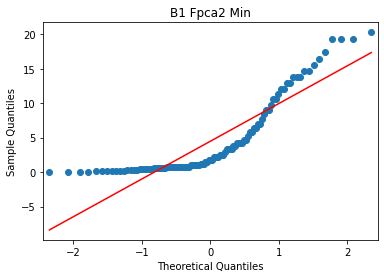

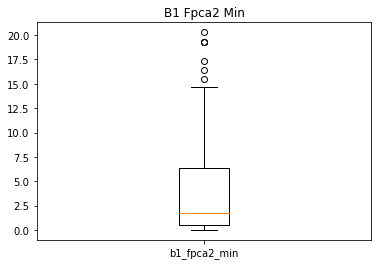

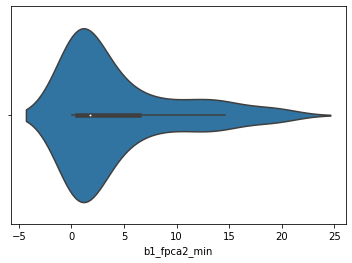

b1_fpca2_max


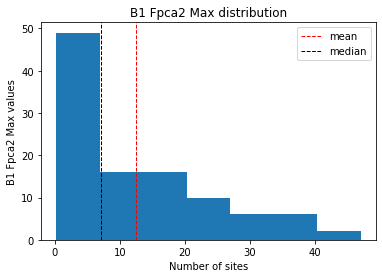

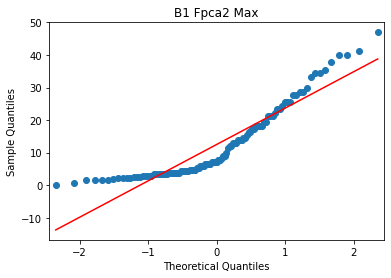

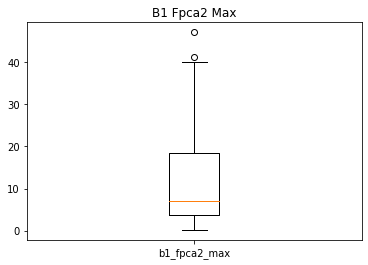

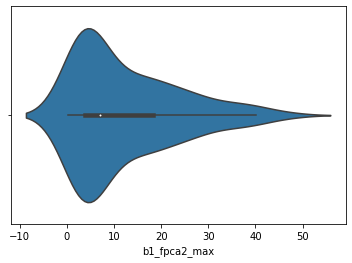

b1_fpca2_mean


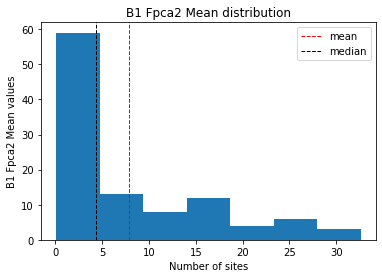

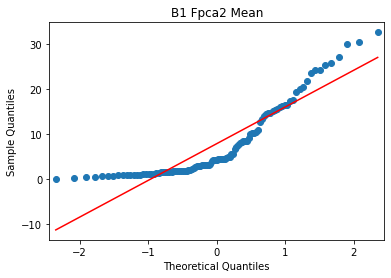

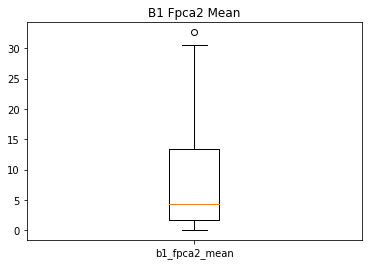

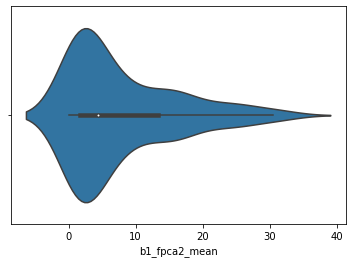

b1_fpca2_med


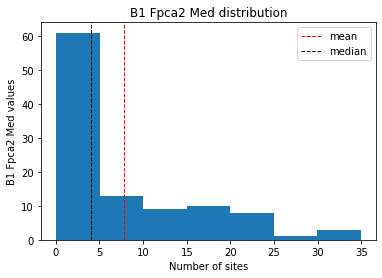

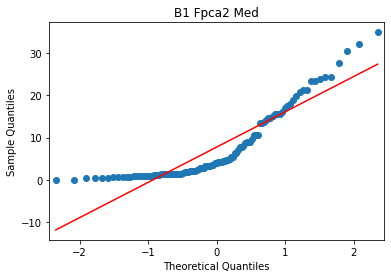

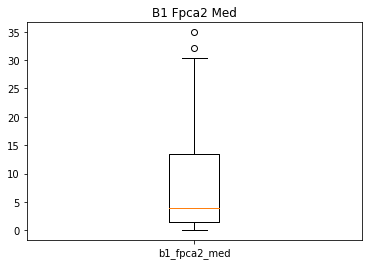

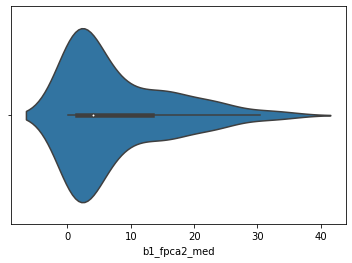

b1_fpca2_p25


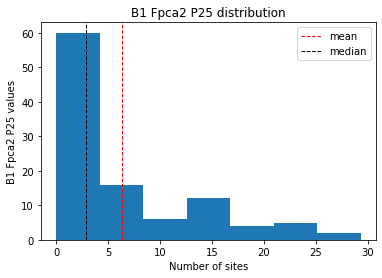

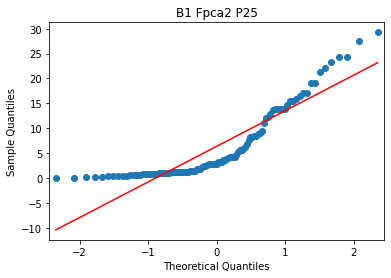

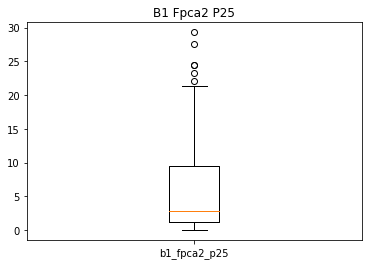

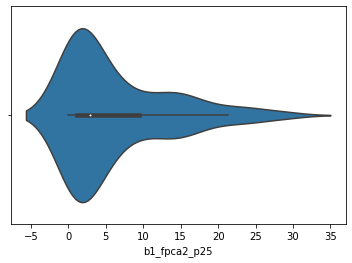

b1_fpca2_p50


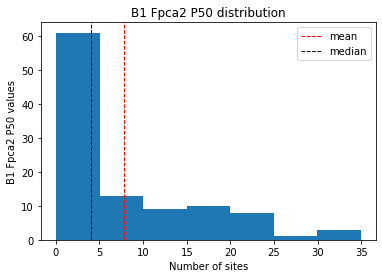

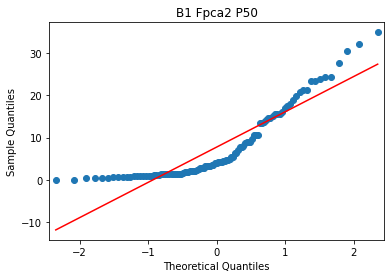

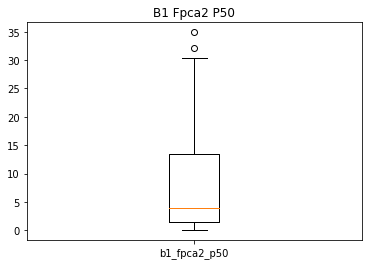

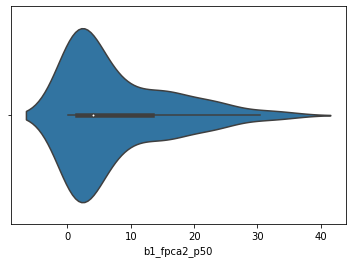

b1_fpca2_p75


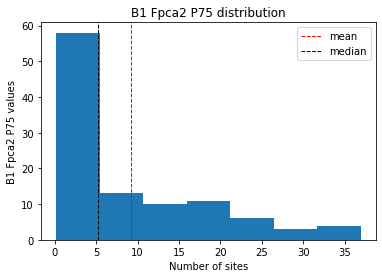

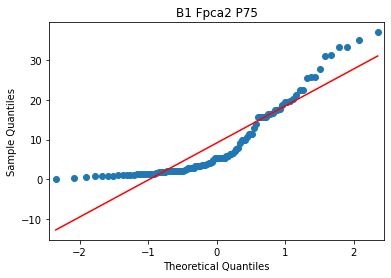

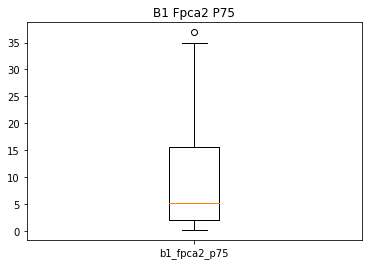

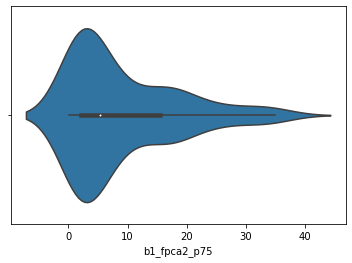

b1_fpca2_p95


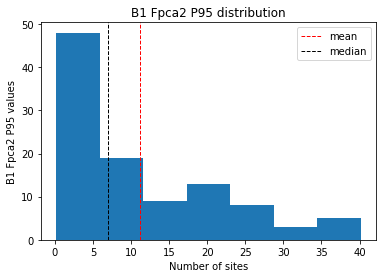

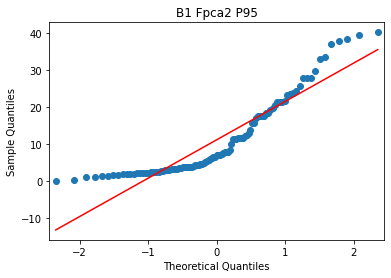

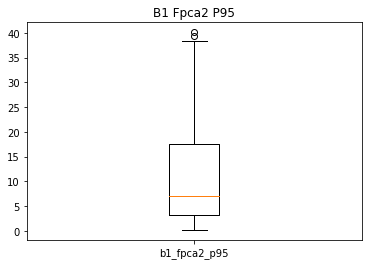

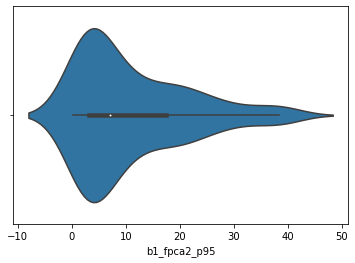

b1_fpca2_p99


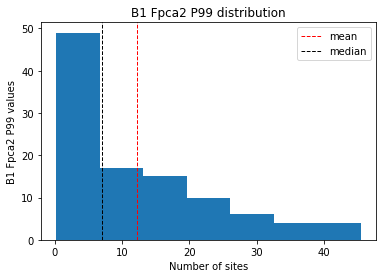

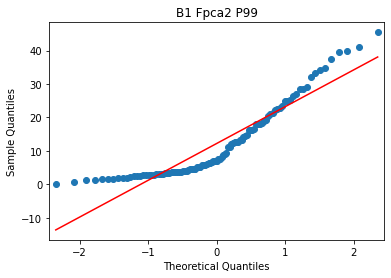

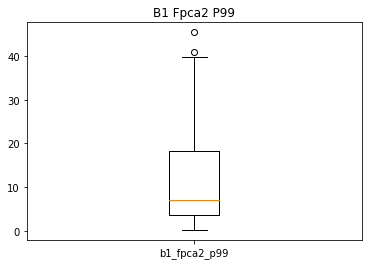

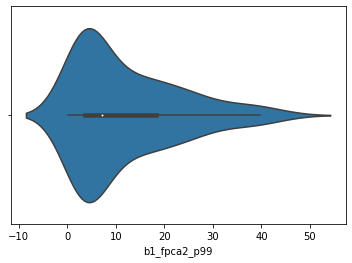

In [36]:
for i in key_var[1:]:
    print(i)
    plt.hist(df_out[i], bins=7)
    plt.axvline(df_out[i].mean(), color='red',
    linestyle='dashed', linewidth=1, label='mean')
    plt.axvline(df_out[i].median(), color='black',
    linestyle='dashed', linewidth=1, label='median')
    plt.title(i.title().replace("_", " ") + " distribution")
    plt.xlabel('Number of sites')
    plt.ylabel(i.title().replace("_", " ") + " values")
    plt.legend()

    plt.show()
    
    sm.qqplot(df_out[[i]].sort_values([i]).dropna(),line='s')
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    plt.boxplot(df_out[i].dropna(), labels=[i])
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    sns.violinplot(x=df_out[i])
    plt.show()
    print("="*50)
    



Violin plot:
 - the black bar with the white dot in the middle is the interquartile range
 - the white dot represents the median.
 - the height at each point (when the violin plot is horizontal) gives us the relative frequency. 
 - the thin black lines to the right/left of the interquartile range are the whiskers 
 - the extreme values are shown in the part of the distribution beyond the whiskers

In [37]:
df_key_out.skew()

C:\Users\rmcgr\AppData\Local\Temp\ipykernel_9036\292795257.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_key_out.skew()


bio_agb_kg1ha    1.642419
b1_fpca2_min     1.388624
b1_fpca2_max     1.111859
b1_fpca2_mean    1.257864
b1_fpca2_med     1.299848
b1_fpca2_p25     1.351985
b1_fpca2_p50     1.299848
b1_fpca2_p75     1.258762
b1_fpca2_p95     1.180139
b1_fpca2_p99     1.122860
dtype: float64

In [38]:
df_key_out.kurtosis()

C:\Users\rmcgr\AppData\Local\Temp\ipykernel_9036\1828242374.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_key_out.kurtosis()


bio_agb_kg1ha    1.546944
b1_fpca2_min     0.811907
b1_fpca2_max     0.382423
b1_fpca2_mean    0.648594
b1_fpca2_med     0.864250
b1_fpca2_p25     0.965105
b1_fpca2_p50     0.864250
b1_fpca2_p75     0.692241
b1_fpca2_p95     0.511752
b1_fpca2_p99     0.395853
dtype: float64

In [39]:
for var in key_var[1:]:

      stat, p = scistat.shapiro(df_key[var].dropna())

      print("feature=", var, "     p-value =", '{:.6f}'.format(p))

feature= bio_agb_kg1ha      p-value = 0.000000
feature= b1_fpca2_min      p-value = 0.000000
feature= b1_fpca2_max      p-value = 0.000000
feature= b1_fpca2_mean      p-value = 0.000000
feature= b1_fpca2_med      p-value = 0.000000
feature= b1_fpca2_p25      p-value = 0.000000
feature= b1_fpca2_p50      p-value = 0.000000
feature= b1_fpca2_p75      p-value = 0.000000
feature= b1_fpca2_p95      p-value = 0.000000
feature= b1_fpca2_p99      p-value = 0.000000


In [40]:
thirdq, firstq = df_key_out[var_].quantile(0.75), df_key_out[var_].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")

-4684.68 <--> 7807.8


In [41]:
df.loc[df[var_]>extvalhigh].T

uid_x,23,26,28,53,42,54,55,22,57,58,56,4,5,6,105,48,1,43,60
site,amg01,amg05,amg08,buff01,el01,ep01,girra01,gulf11,hsf01,hsf02,hshr01,jdr01,jdr02,jdr03,legu07,lim03,lit01,vrd37,wedo03
bio_agb_kg1ha,8376.216104,24670.8,29521.8,9995.51,11596.2,18757.2,17994.76,10763.3225,25701.69,26636.295,35199.71,21469.14,22699.39,11180.4,9708.965,8031.45,25585.07,11596.2,11338.1275
b1_fpca2_min,16.44972,13.779837,23.343081,19.299746,1.788801,53.781818,4.725986,9.056872,29.81888,33.189796,30.934763,16.44972,13.779837,10.53381,19.299746,12.933355,34.327137,12.109756,17.380726
b1_fpca2_max,33.189796,25.453907,45.850407,40.076439,4.725986,71.015564,34.327137,27.614885,46.998966,41.232662,52.66787,34.327137,27.614885,18.330997,34.327137,28.71195,44.698696,18.330997,34.327137
b1_fpca2_mean,23.644734,18.835165,35.404507,30.465705,3.30558,58.866707,11.157696,16.156618,37.714575,36.739747,41.459262,25.83706,20.714716,14.593527,25.388334,19.422444,40.3688,16.431291,24.237187
b1_fpca2_med,24.391783,19.299746,35.469837,32.058704,3.292108,58.682688,9.056872,15.549127,37.767738,36.043419,40.654551,24.391783,20.286156,14.648533,24.391783,19.792951,41.232662,16.915223,23.343081
b1_fpca2_std,3.813149,2.715835,5.048976,6.234632,0.840765,3.777438,6.230756,5.350526,4.619884,2.569199,5.368042,5.562332,3.655886,1.912195,3.416186,4.331142,2.869116,1.755634,4.395731
b1_fpca2_p25,21.289408,16.44972,32.907023,24.391783,2.77468,56.800046,7.683354,12.333469,34.327137,34.327137,37.480054,21.289408,17.380726,13.779837,23.343081,16.480504,38.921173,15.538734,22.053852
b1_fpca2_p50,24.391783,19.299746,35.469837,32.058704,3.292108,58.682688,9.056872,15.549127,37.767738,36.043419,40.654551,24.391783,20.286156,14.648533,24.391783,19.792951,41.232662,16.915223,23.343081
b1_fpca2_p75,25.722572,20.286156,38.056097,34.899603,3.860597,60.271679,12.109756,18.612711,40.365495,38.056097,44.121067,30.097851,23.343081,15.538734,27.614885,21.289408,42.389004,17.618294,25.453907


In [42]:
df_key_out_out = df_key.loc[df_key[var_]<extvalhigh]

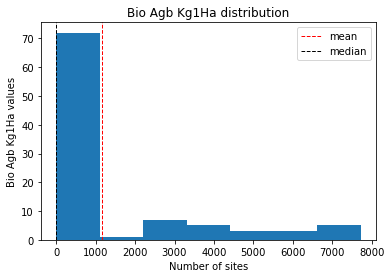

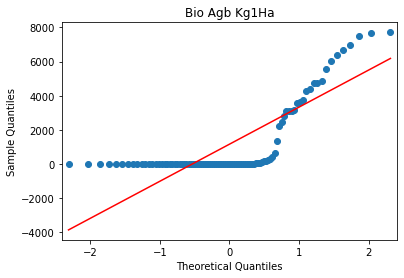

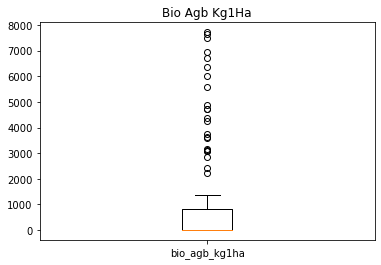

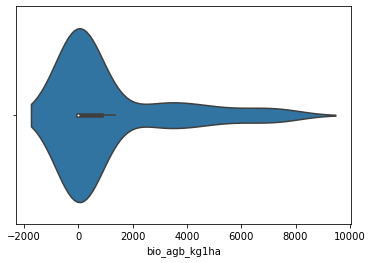

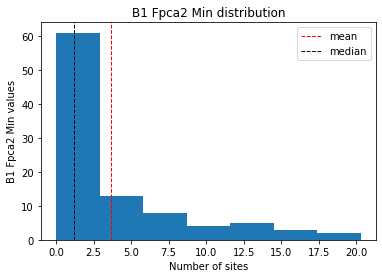

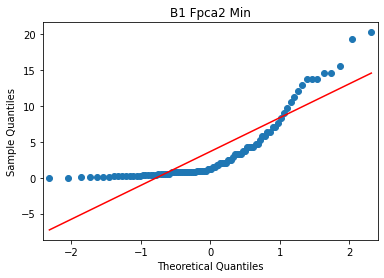

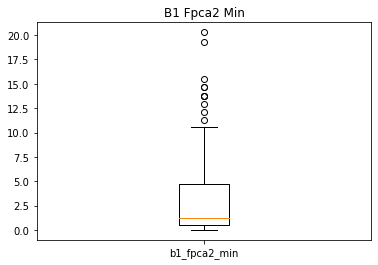

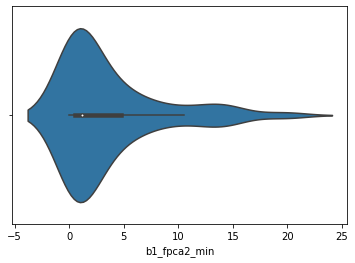

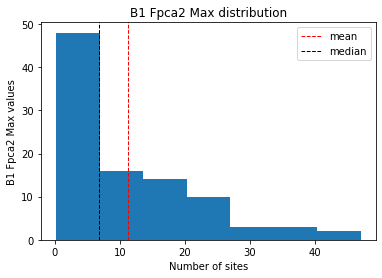

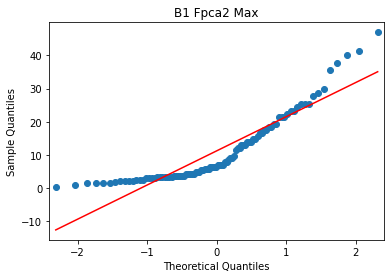

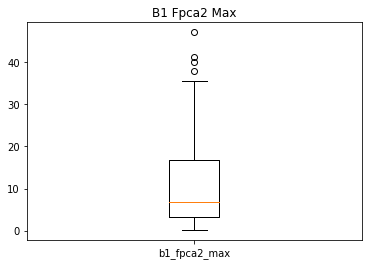

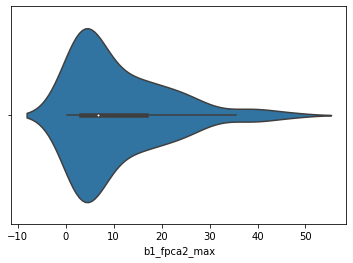

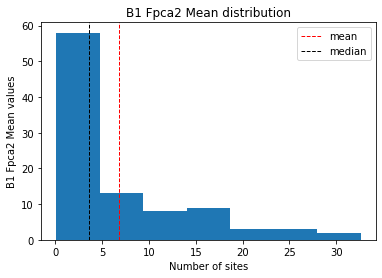

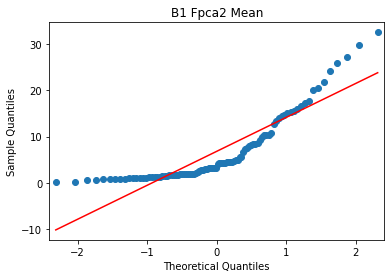

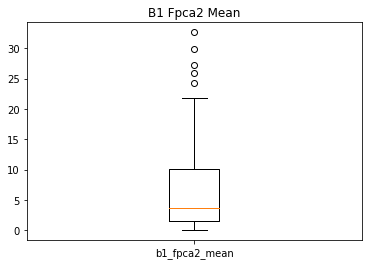

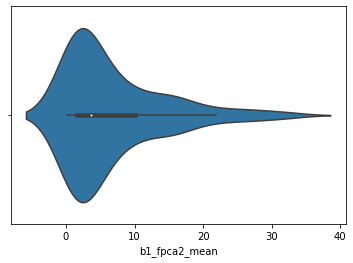

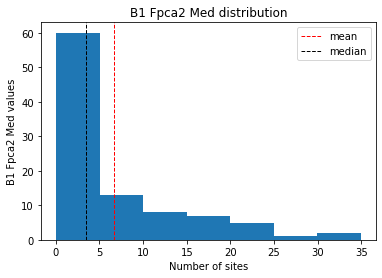

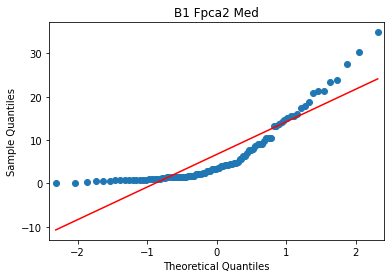

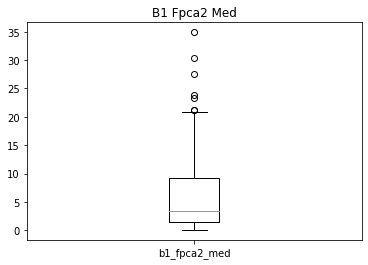

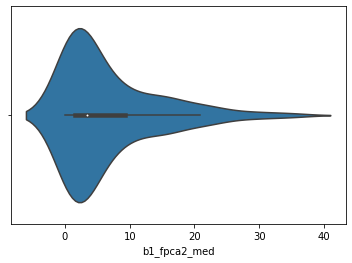

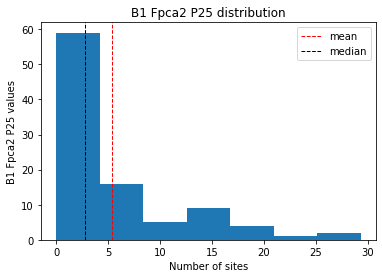

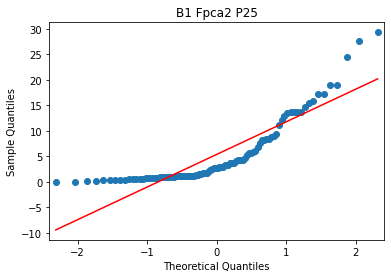

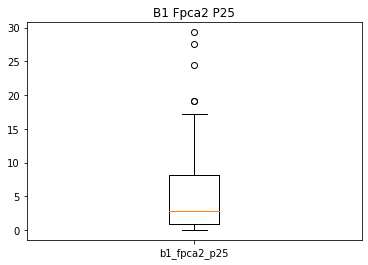

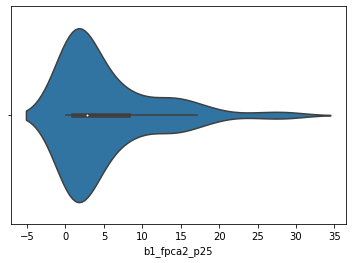

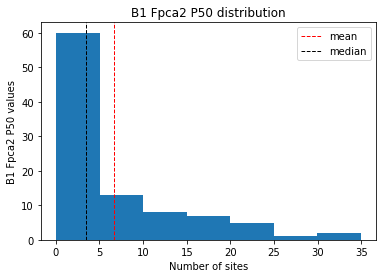

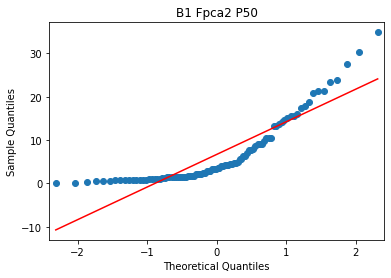

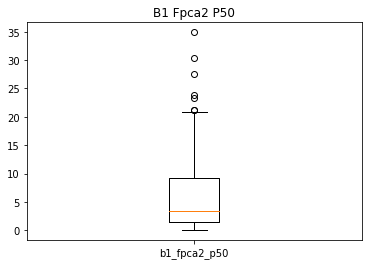

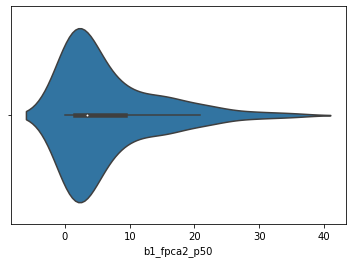

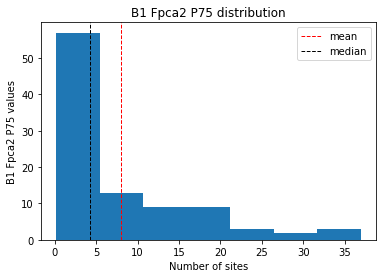

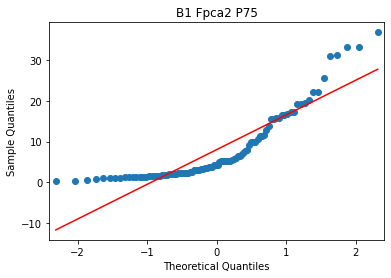

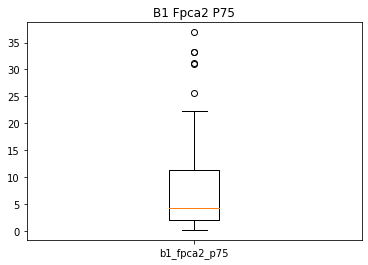

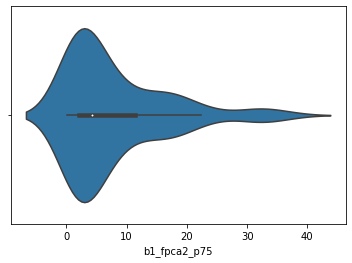

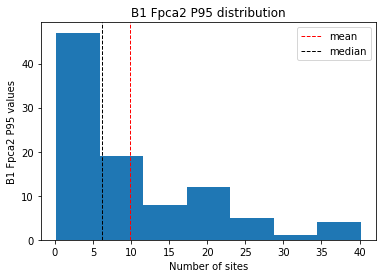

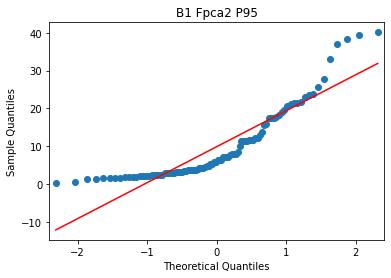

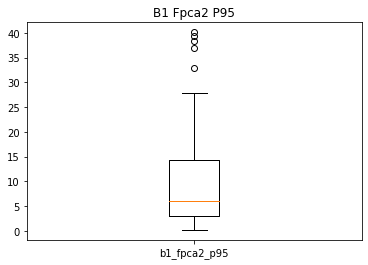

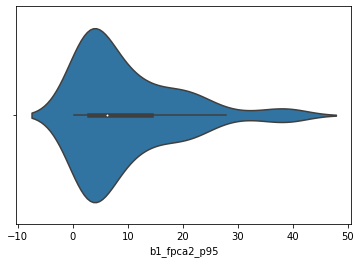

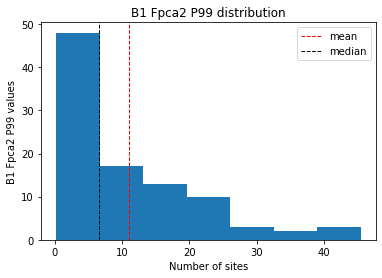

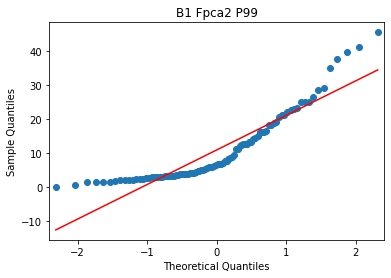

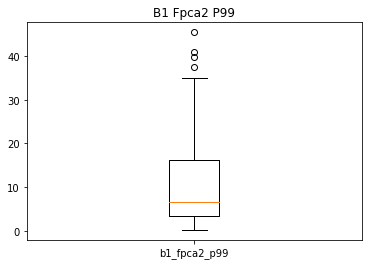

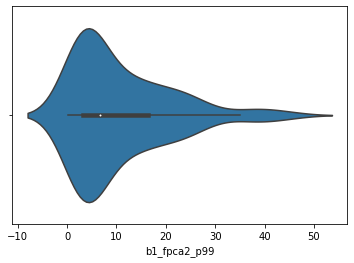

In [43]:
for i in key_var[1:]:
    plt.hist(df_key_out_out[i], bins=7)
    plt.axvline(df_key_out_out[i].mean(), color='red',
    linestyle='dashed', linewidth=1, label='mean')
    plt.axvline(df_key_out_out[i].median(), color='black',
    linestyle='dashed', linewidth=1, label='median')
    plt.title(i.title().replace("_", " ") + " distribution")
    plt.xlabel('Number of sites')
    plt.ylabel(i.title().replace("_", " ") + " values")
    plt.legend()

    plt.show()
    
    sm.qqplot(df_key_out_out[[i]].sort_values([i]).dropna(),line='s')
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    plt.boxplot(df_key_out_out[i].dropna(), labels=[i])
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    sns.violinplot(x=df_key_out_out[i])
    plt.show()
    print("="*50)
    

<AxesSubplot:xlabel='b1_fpca2_mean', ylabel='bio_agb_kg1ha'>

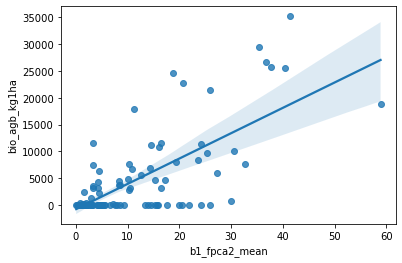

In [44]:
sns.regplot(y=df.bio_agb_kg1ha, x=df.b1_fpca2_mean)

<AxesSubplot:xlabel='b1_fpca2_mean', ylabel='bio_agb_kg1ha'>

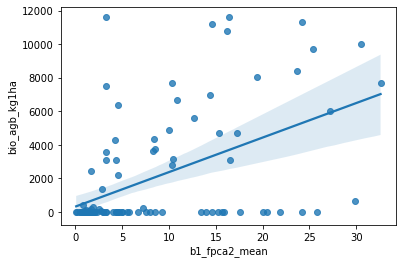

In [45]:
sns.regplot(y=df_out.bio_agb_kg1ha, x=df_out.b1_fpca2_mean)

In [46]:
df_out

,site,bio_agb_kg1ha,b1_fpca2_min,b1_fpca2_max,b1_fpca2_mean,b1_fpca2_med,b1_fpca2_std,b1_fpca2_p25,b1_fpca2_p50,b1_fpca2_p75,b1_fpca2_p95,b1_fpca2_p99
uid_x,,,,,,,,,,,,
52,agb02,0.000000,14.648533,25.453907,20.006735,20.787782,3.180215,17.147974,20.787782,22.308666,23.870787,25.137283
23,amg01,8376.216104,16.449720,33.189796,23.644734,24.391783,3.813149,21.289408,24.391783,25.722572,27.893631,32.130563
24,amg02,0.000000,12.109756,23.343081,15.908027,15.549127,2.739258,13.779837,15.549127,17.380726,19.584018,22.591268
25,amg03,0.000000,3.741091,13.779837,6.702390,6.417120,2.946635,4.099609,6.417120,7.723121,11.345316,13.292933
27,amg06,3086.160000,8.356935,23.343081,16.552498,17.380726,3.837718,13.779837,17.380726,19.299746,21.392091,22.952883
...,...,...,...,...,...,...,...,...,...,...,...,...
73,wh11,0.000000,0.752944,6.417120,1.931255,1.486260,1.286502,1.212895,1.486260,2.210924,3.874893,5.908674
74,wh12,0.000000,0.752944,2.120632,1.146631,1.090717,0.374599,0.914641,1.090717,1.212895,1.871759,2.070857
75,wh13,0.000000,0.275141,4.219115,0.801123,0.486249,0.932047,0.275141,0.486249,0.968540,1.964450,3.768182


In [47]:
# df_clean = df_out[:]
# df_clean.drop("site", axis=1, inplace=True)
# sns.heatmap(df_clean)

In [48]:
'bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean'

('bio_agb_kg1ha', 'b1_fpca2_min', 'b1_fpca2_max', 'b1_fpca2_mean')